In [12]:
#Test mayavi
%gui qt
from mayavi import mlab
mlab.test_plot3d()

In [5]:
import numpy as np
import mayavi.mlab


In [60]:
#Generate disparity
!python ./psmnet_origin/submission.py    --loadmodel ./psmnet/models/finetune_300.tar   --datapath ./KITTI/object/testing/ --save_path ./result

Traceback (most recent call last):
  File "./psmnet_origin/submission.py", line 40, in <module>
    from psmnet.dataloader import KITTI_submission_loader as DA
ModuleNotFoundError: No module named 'psmnet'


In [73]:
!python ./preprocessing/generate_lidar.py --calib_dir ./KITTI/object/testing/calib/ --save_dir ./result/pseudo-lidar_velodyne/     --disparity_dir ./result     --max_high 1

Finish Depth 000000
Finish Depth 000000
Finish Depth 000001
Finish Depth 000001
Finish Depth 000003


In [3]:
#Visualize
pointcloud = np.fromfile(str("./result/pseudo-lidar_velodyne/000000.bin"), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor


vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)


(297790, 4)


[[0.35790035 0.35790035 0.35709164 ... 0.19291982 0.19291982 0.19290456]
 [0.3610132  0.3610132  0.35999084 ... 0.19276722 0.19278248 0.192813  ]
 [0.3632868  0.3632868  0.3622339  ... 0.19259937 0.1926604  0.19275196]
 ...
 [0.25334555 0.25334555 0.25349814 ... 0.2640116  0.26417944 0.26440832]
 [0.2542153  0.2542153  0.2543679  ... 0.2652018  0.26541543 0.2656901 ]
 [0.2542153  0.2542153  0.2543679  ... 0.2652018  0.26541543 0.2656901 ]]


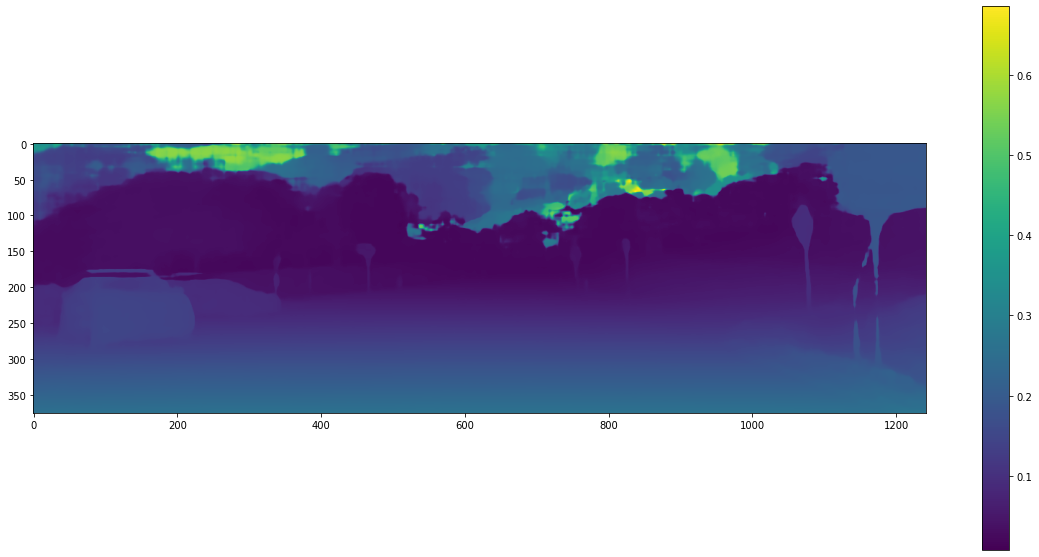

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
depth = plt.imread('./result/000001.png')
print(depth)
plt.imshow(depth, cmap="viridis")
plt.colorbar()
plt.show()

In [9]:
#Visualize
pointcloud = np.fromfile(str("./KITTI/object/testing/velodyne/000001.bin"), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor


vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)

(122109, 4)


In [11]:
#Script for comparing pseudo lidar and True value.

pointcloud = np.fromfile(str("./result/pseudo-lidar_velodyne/000001.bin"), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud1 = np.fromfile(str("./KITTI/object/testing/velodyne/000001.bin"), dtype=np.float32, count=-1).reshape([-1,4])
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

x1 = pointcloud1[:, 0]  # x position of point
y1 = pointcloud1[:, 1]  # y position of point
z1 = pointcloud1[:, 2]  # z position of point
r1 = pointcloud1[:, 3]  # reflectance value of point
d1 = np.sqrt(x1 ** 2 + y1 ** 2)  # Map Distance from sensor
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(1, 0, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

mayavi.mlab.points3d(x1, y1, z1,
                     d1,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
x1=np.linspace(5,5,50)
y1=np.linspace(0,0,50)
z1=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.plot3d(x1,y1,z1)